# Matrix Factorization
Find the rank-one matrix $A\in \mathbb{R}^{3×3}$ that is closest to the incomplete matrix
$
\begin{equation}
Y=
\begin{bmatrix}
    0 & 1 & * \\
    1 & * & 1 \\
    * & 1 & 2
\end{bmatrix}
\end{equation}
$, i.e. $A$ should minimize the squared error to the observed entries. You may find $A$ by writing your own code, or using a suitable Python library, or even solving for it analytically. Let $A=UV^T$ be the matrix factorization of $A$, where $U,V^T \in \mathbb{R}^{3×1}$ are the factors.

## Approach
We can perform coordinate descent through the alternating least squares regression algorithm.

Squared error $\mathcal{L}(U,V;A) = \sum_{(a,i) \in D} \frac{1}{2} (\,Y_{ai} - (UV^T)_{ai} \,)^2 + \frac{\lambda}{2}\lVert U\rVert^2 + \frac{\lambda}{2}\lVert V\rVert^2$

### Random initialization
Initialize $V_1, V_2, \ldots, V_m \in \mathbb{R}^k$ randomly.


### Alternating minimization problems

Find $U_a$ that minimizes $\sum_{(a,i) \in D} \frac{1}{2} (\,Y_{ai} - (U_a V_i^T) \,)^2 + \frac{\lambda}{2}\lVert U_a\rVert^2$

Find $V_i$ that minimizes $\sum_{(a,i) \in D} \frac{1}{2} (\,Y_{ai} - (U_a V_i^T) \,)^2 + \frac{\lambda}{2}\lVert V_i\rVert^2$

## Perform initialization

[[ 0.  1. nan]
 [ 1. nan  1.]
 [nan  1.  2.]]


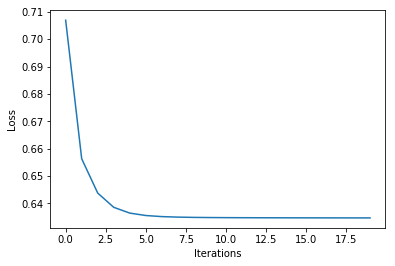

[[0.48346513 0.59663082 0.9319191 ]
 [0.6198575  0.76494883 1.19482669]
 [0.97110154 1.19840929 1.87187868]]


In [156]:
import numpy as np
import matplotlib.pyplot as plt

Y = np.array([[0,1,np.nan],[1,np.nan,1],[np.nan,1,2]])
m, n = Y.shape

print(Y)

reg_param = 0.01
num_iterations = 20

U = np.random.rand(3,1)
V = np.random.rand(1,3) # already transposed

W = 1-(np.isnan(Y))*1
# convert nan to num
Y = np.nan_to_num(Y)

losses = []

def alternating_least_squares():   
    # convergence condition
    for iteration in range(num_iterations):
        for a in range(m):
            VW = np.dot(V,np.diag(W[a,:]))
            U[a,:] = np.linalg.solve(np.dot(VW, VW.T) + reg_param * np.eye(1),
                                     np.dot(V, Y[a,:].T)).T
        for i in range(n):
            WU = np.dot(np.diag(W[:,i]),U)
            V[:,i] = np.linalg.solve(np.dot(WU.T, WU) + reg_param * np.eye(1),
                                     np.dot(U.T, Y[:,i]))
            
        losses.append(np.sum((W*(Y - np.dot(U, V)))**2))
    
alternating_least_squares()
iterations = np.arange(0, num_iterations)

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(iterations, losses)
plt.show()
print(np.dot(U, V))